### import dependencies  
We provided the packages we had used, you can import your prefered package but be aware of version conflict.

In [23]:
#import dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot

check weither your code run with GPUs or not

In [24]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Data preprocessing

In [25]:
# download and split the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("training data = ", x_train.shape)
print("testing data = ", x_test.shape)

# standarize your data
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

# encoding your label
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )

# apply the data augmentation on the training set
datagen.fit(x_train)

training data =  (50000, 32, 32, 3)
testing data =  (10000, 32, 32, 3)


### Resuming training  
As problem description said, there're lots of reason can cause your training accidently be interupted. You should learn how to reload TA's model and continue training. You should also learn how to save your model when training.



In [27]:
# load TA's model
model = tf.keras.models.load_model("Prob2_epoch_100.h5")

import os
batch_size = 128
epochs=200

# some pacakge and code should be imported and executed here
epochs=100
from tensorflow.keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.HW5_Cifar10.hdf5', verbose=1, save_best_only=True)

optimizer = tf.optimizers.Adam(learning_rate=0.0005,decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# tensorflow execute model.fit to start training, below code can start training but can't save your model and learning log while training.
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), callbacks=[checkpointer],
                    steps_per_epoch=x_train.shape[0] // batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(x_test,y_test))

Epoch 1/100
390/390 [==============================] - 17s 40ms/step - loss: 0.4308 - accuracy: 0.8835 - val_loss: 0.4894 - val_accuracy: 0.8726

Epoch 00001: val_loss improved from inf to 0.48941, saving model to model.HW5_Cifar10.hdf5
Epoch 2/100
390/390 [==============================] - 16s 40ms/step - loss: 0.4344 - accuracy: 0.8812 - val_loss: 0.4891 - val_accuracy: 0.8720

Epoch 00002: val_loss improved from 0.48941 to 0.48913, saving model to model.HW5_Cifar10.hdf5
Epoch 3/100
390/390 [==============================] - 15s 39ms/step - loss: 0.4325 - accuracy: 0.8815 - val_loss: 0.4743 - val_accuracy: 0.8770

Epoch 00003: val_loss improved from 0.48913 to 0.47430, saving model to model.HW5_Cifar10.hdf5
Epoch 4/100
390/390 [==============================] - 16s 40ms/step - loss: 0.4298 - accuracy: 0.8815 - val_loss: 0.5651 - val_accuracy: 0.8547

Epoch 00004: val_loss did not improve from 0.47430
Epoch 5/100
390/390 [==============================] - 15s 39ms/step - loss: 0.4288 

In [28]:
import matplotlib.pyplot as plt
import numpy as np

dataArray = np.genfromtxt('training.csv', delimiter=',', names=True)

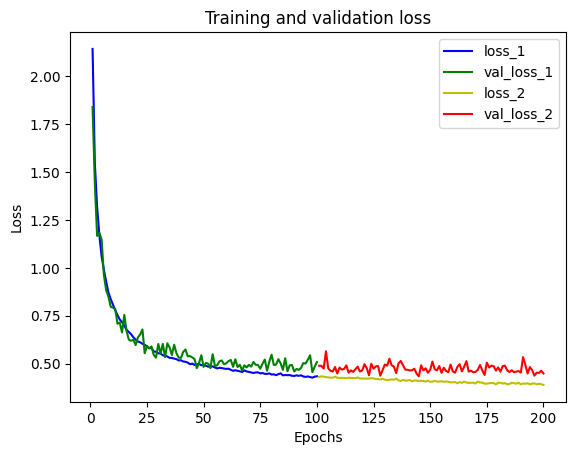

In [29]:
acc = dataArray['accuracy']
val_acc = dataArray['val_accuracy']
loss = dataArray['loss']
val_loss = dataArray['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'b', label='loss_1')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'g', label='val_loss_1')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(101, len(acc) + 101)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'y', label='loss_2')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='val_loss_2')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

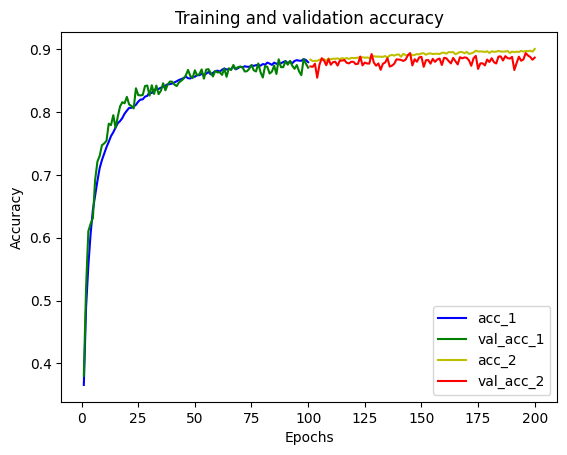

In [30]:
plt.clf()   # clear figure
acc_values = dataArray['accuracy']
val_acc_values = dataArray['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc_values, 'b', label='acc_1')
plt.plot(epochs, val_acc_values, 'g', label='val_acc_1')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

epochs = range(101, len(acc) + 101)

plt.plot(epochs, acc, 'y', label='acc_2')
plt.plot(epochs, val_acc, 'r', label='val_acc_2')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()